# Business Problem
It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

# Business Requirement


In [180]:
# import packages

import os
from datetime import datetime,date

import numpy as np
import pandas as pd
import calendar
import imblearn

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import *

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *


from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.impute import *
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# hide warnings
import warnings


# set options
%matplotlib inline
warnings.filterwarnings('ignore')

sns.set(color_codes=True)

pd.set_option('max_colwidth',1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Understanding, Preparation, and Pre-Processing

In [2]:
# import data

dataset = pd.read_csv('train.csv')

dictionary = pd.read_csv('data_dictionary.csv')

In [3]:
# dataset

dataset.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
# dataset statistical data

dataset.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [5]:
# dataset information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
# data dictionary

dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [7]:
# data

print("total records:",dataset.shape[0])
print("total variables:",dataset.shape[1])

total records: 69999
total variables: 172


In [8]:
# drop id columns

dataset.drop(columns='id',inplace=True)

dataset.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0

In [9]:
# select target column from data

data_churn = dataset['churn_probability']

dataset = dataset.drop(columns='churn_probability')

In [10]:
# target

print(f'''
values in target variable: {data_churn.unique()}
values: {data_churn.size}
''')


values in target variable: [0 1]
values: 69999



In [11]:
# variables

print(f'''
values: {dataset.shape[0]}
''')

dataset.head()


values: 69999



,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.00

--------------

# Feature Engineering

In [12]:
# date columns

data_cols = dataset.columns

print('total columns:',len(data_cols))

total columns: 170


In [13]:
cat_cols = dataset.select_dtypes('object').columns

print('categorical columns in data:',len(cat_cols))

dataset[cat_cols].head()

categorical columns in data: 9


,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


* categorical columns are date columns
* take date from the columns
* date format - MM/DD/YYYY

In [14]:
# split dataset into training and validation datatset, in 80:20 ratio

train_data,val_data,train_data_churn,val_data_churn = train_test_split(dataset,data_churn,train_size=0.8,random_state=100)

In [15]:
# train data

print('train data size:',train_data.shape)

train data size: (55999, 170)


In [16]:
# validation data

print('validation data size:',val_data.shape)

validation data size: (14000, 170)


### single-value dominance columns treatment 

* columns with high proportion share of most occuring unique value -- drop columns

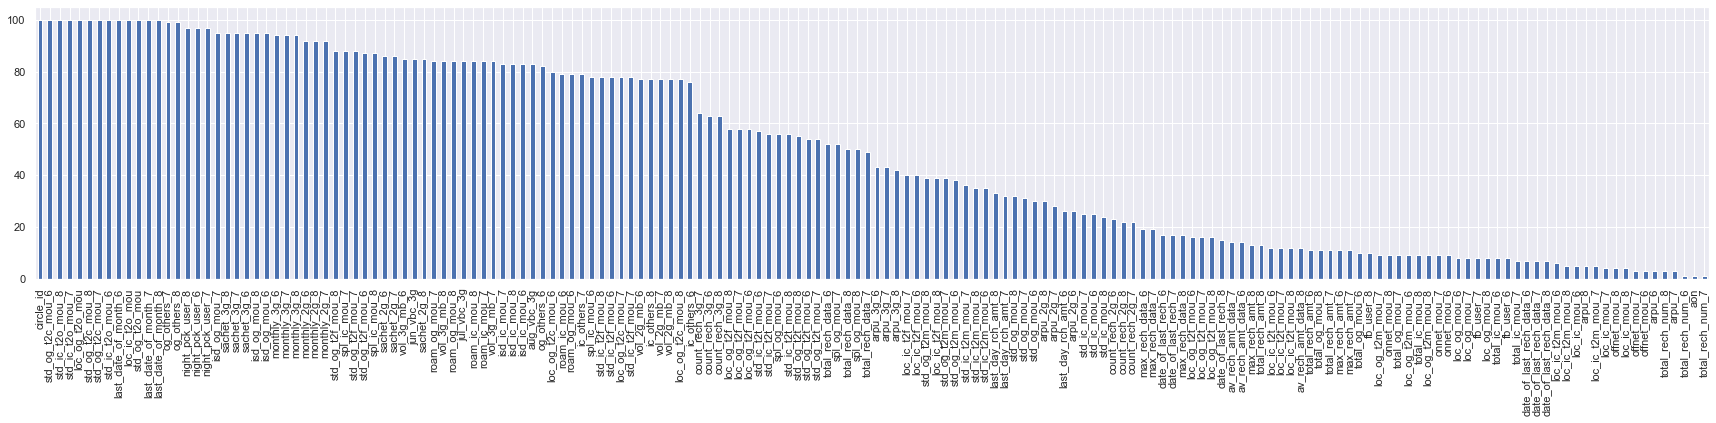

In [17]:
# numerical columns with proportion share of most occuring unique value

value_share_cols = dict()

for column in data_cols:
    try:
        # highest_share_value --> value count of most ocuring value / total rows in dataset
        highest_share_value = int((train_data[column].value_counts(normalize=True)*100)[0])
        value_share_cols[column] = highest_share_value
    except(KeyError):
        highest_share_value = int((train_data[column].value_counts(normalize=True)*100).values[0])
        value_share_cols[column] = highest_share_value
        pass

# plot columns value single value with maximum shares
value_share_cols_data = pd.Series(value_share_cols)
value_share_cols_data.sort_values(ascending=False).plot(kind='bar',figsize=(30,5))
plt.show()

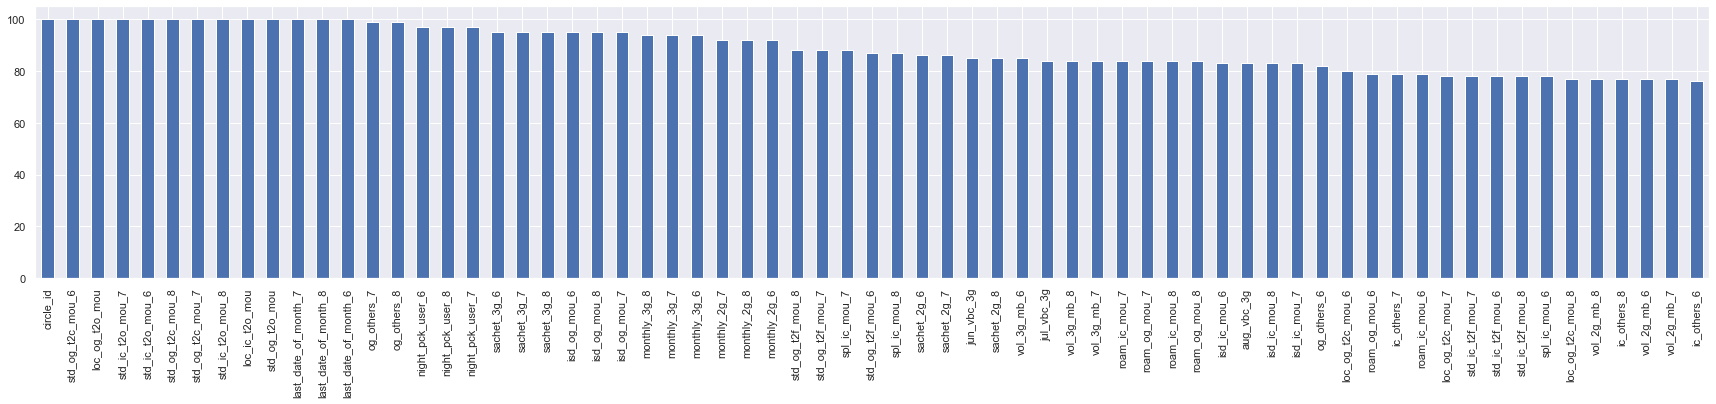

In [18]:
# select columns with share of single value more than threshold proportion

threshold_dominance = 75

dominant_cols = [column for column,value in value_share_cols.items() if value>=threshold_dominance]

# plot columns with more than threshold proportion share of single value 
value_share_cols_data[dominant_cols].sort_values(ascending=False).plot(kind='bar',figsize=(30,5))
plt.show()

In [19]:
# descriiption of columns having share of single value above threshold

train_data[dominant_cols].describe(percentiles=[0.25,0.50,0.75,0.90,0.99]).iloc[5:,:]

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,og_others_6,og_others_7,og_others_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
50%,109.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.00,0.00,0.000,0.0000,0.000,0.000,0.0,0.0,0.0,0.0000,0.000,0.0000,0.00,0.00,0.00,0.0000,0.000,0.0000,0.0,0.0,0.0,0.00,0.00,0.00,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000
75%,109.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.00,0.00,0.000,0.0000,0.000,0.000,0.0,0.0,0.0,0.0000,0.000,0.0000,0.00,0.00,0.00,0.0000,0.000,0.0000,0.0,0.0,0.0,0.00,0.00,0.00,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000
90%,109.0,0.0,0.0,0.0,12.1330,5.130,5.2220,22.8800,9.900,9.306,2.43,3.05,3.400,0.6600,0.460,0.460,0.0,0.0,0.0,0.0000,0.000,0.0000,1.28,0.00,0.00,2.7300,2.780,2.7800,0.0,0.0,0.0,0.26,0.06,0.13,4.8100,6.630,6.5560,0.6300,0.780,0.750,104.1800,97.920,93.006,299.996,331.5000,368.6300,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,154.3660,130.4680,106.0560
99%,109.0,0.0,0.0,0.0,221.8054,157.729,163.2792,295.1524,224.445,215.326,20.13,23.58,24.228,25.6006,24.475,24.038,0.0,0.0,0.0,8.5553,8.833,7.1092,6.94,0.00,0.00,40.6353,43.134,39.4088,0.0,0.0,0.0,0.66,0.64,0.69,164.8306,177.607,178.3376,15.0565,17.202,16.608,992.2782,999.333,983.730,2168.888,2232.6908,2333.9514,1.0,1.0,1.0,1.0,1.0,1.0,8.0,9.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,1216.8758,1241.4292,1179.0062
max,109.0,0.0,0.0,0.0,2850.9800,4155.830,4169.8100,3775.1100,2812.040,5337.040,342.86,916.24,351.830,628.5600,465.790,354.160,0.0,0.0,0.0,5900.6600,5490.280,5681.5400,800.89,270.24,394.93,1351.1100,1136.080,1394.8900,0.0,0.0,0.0,19.76,13.46,16.86,6789.4100,5289.540,4127.0100,1362.9400,1495.940,1209.860,7213.0600,7873.550,11117.610,45735.400,28144.1200,30036.0600,1.0,1.0,1.0,4.0,5.0,5.0,34.0,48.0,44.0,9.0,16.0,16.0,29.0,33.0,41.0,8476.2600,9165.6000,11166.2100


* some columns have only one value, standard deviation = 0 -- drop columns
* some columns have high outliers, max >>>> 99% value -- outlier treatment

In [20]:
print(f'''
total column with more than {threshold_dominance}% share of single value: {len(dominant_cols)}
data loss: {round(train_data[dominant_cols].size*100/train_data.size,2)}%
''')


total column with more than 75% share of single value: 67
data loss: 39.41%



In [21]:
# drop column with more than threshold proportion share of single value

train_data = train_data.drop(columns=dominant_cols,axis=1)

train_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,fb_user_6,fb_user_7,fb_user_8,aon
59805,20.000,457.270,0.000,NaN,57.21,0.00,NaN,132.28,0.00,NaN,57.21,0.00,NaN,132.28,0.00,NaN,0.00,0.00,NaN,189.49,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,189.49,0.00,NaN,0.66,0.00,NaN,60.93,0.00,NaN,0.00,0.00,NaN,61.59,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,61.59,0.06,0,1,2,0,0,0,0,0,0,NaN,7/27/2014,8/26/2014,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,778
32717,157.847,177.925,76.996,276.99,175.51,190.18,285.33,145.68,138.56,234.09,149.64,182.84,266.73,115.54,138.48,0.00,0.00,0.00,500.83,265.19,321.33,42.89,25.48,7.33,0.25,29.71,0.00,43.14,55.19,7.33,22.81,8.84,13.43,566.79,329.24,342.09,64.59,55.54,103.26,1007.69,433.21,282.41,2.78,6.01,0.00,1075.08,494.78,385.68,1.13,0.00,0.00,4.53,45.01,3.64,5.66,45.01,3.64,1086.23,539.79,389.33,4,5,4,200,160,130,110,110,130,6/27/2014,7/19/2014,8/22/2014,110,0,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1322
5964,309.004,468.304,412.625,31.63,38.03,8.51,122.51,215.51,36.94,12.31,16.56,3.11,27.28,83.01,25.59,4.61,3.28,1.16,44.21,102.86,29.88,19.31,21.46,5.39,90.61,129.21,10.18,109.93,150.68,15.58,0.00,0.00,0.00,154.23,256.04,46.99,8.01,53.19,28.66,94.66,81.58,80.66,0.00,0.00,0.00,102.68,134.78,109.33,0.00,0.95,0.00,33.46,74.78,58.86,33.46,76.14,58.86,204.53,362.09,237.74,6,9,6,289,530,626,154,198,198,6/27/2014,7/24/2014,8/29/2014,0,48,198,6/25/2014,7/12/2014,8/29/2014,3.0,4.0,2.0,154.0,198.0,198.0,3.0,4.0,2.0,0.0,0.0,0.0,204.0,301.0,352.0,17.53,48.9,86.81,0.0,0.0,0.0,1.0,1.0,1.0,1543
47623,154.108,60.291,265.921,53.64,12.71,49.81,114.81,40.49,239.84,53.64,12.71,49.81,114.81,40.49,237.13,0.00,0.00,0.00,168.46,53.21,286.94,0.00,0.00,0.00,0.00,0.00,1.11,0.00,0.00,1.11,0.66,0.99,2.11,169.66,54.21,290.18,88.46,0.00,33.64,173.19,60.38,494.19,0.00,0.00,10.53,261.66,60.38,538.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,261.66,61.28,538.38,6,2,8,180,70,310,90,70,50,6/19/2014,7/20/2014,8/28/2014,30,0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,857
31881,228.004,222.476,180.528,11.46,12.99,19.28,143.51,154.64,103.03,8.66,12.99,19.28,17.09,56.79,41.36,0.31,0.00,0.23,26.08,69.79,60.88,2.79,0.00,0.00,121.73,97.84,61.39,124.53,97.84,61.39,0.00,0.00,0.00,150.64,167.64,122.31,18.09,46.11,36.41,65.51,193.03,104.49,2

### null values treatment

* columns with high proportion null values -- drop column
* columns with low proportion null values -- impute with mode and median.

In [22]:
# null values in columns

# columns with missing values
missing_columns = list(train_data.columns[train_data.isnull().any()])


# missing columns data
missing_data = pd.DataFrame({"Columns" : missing_columns,                             
                            "Type": '',
                            "Unique Value" : '',

                             "Percentage" : ''})
# unique values
missing_data['Unique Value']  = missing_data.apply(lambda x: list(set(train_data[x['Columns']].dropna())),axis = 1)
#Percentage of missing values
missing_data['Percentage']  = missing_data.apply(lambda x: train_data[x['Columns']].isnull().sum()/ len(train_data[x['Columns']])*100,axis = 1)
# total missing values
missing_data['Total Missing'] = missing_data.apply(lambda x: train_data[x['Columns']].isnull().sum(),axis = 1)
# type of values in column
def check_type(list_):    
    if all([isinstance(word, float) for word in list_]):
        return "float"
    if all([isinstance(word, str) for word in list_]):
        return "string"
    if all([isinstance(word, int) for word in list_]):
        return "int"
missing_data["Type"] = missing_data.apply(lambda x: check_type(x['Unique Value']),axis =1 )
# drop 'Unique Value' from data 
missing_data.drop(columns=['Unique Value'],inplace=True)

# missing values report in data

missing_data.sort_values(by='Percentage',ascending=False)

,Columns,Type,Percentage,Total Missing
66,count_rech_3g_6,float,74.854908,41918
72,arpu_3g_6,float,74.854908,41918
54,date_of_last_rech_data_6,string,74.854908,41918
78,fb_user_6,float,74.854908,41918
63,count_rech_2g_6,float,74.854908,41918
69,av_rech_amt_data_6,float,74.854908,41918
57,total_rech_data_6,float,74.854908,41918
75,arpu_2g_6,float,74.854908,41918
60,max_rech_data_6,float,74.854908,41918
64,count_rech_2g_7,float,74.435258,41683


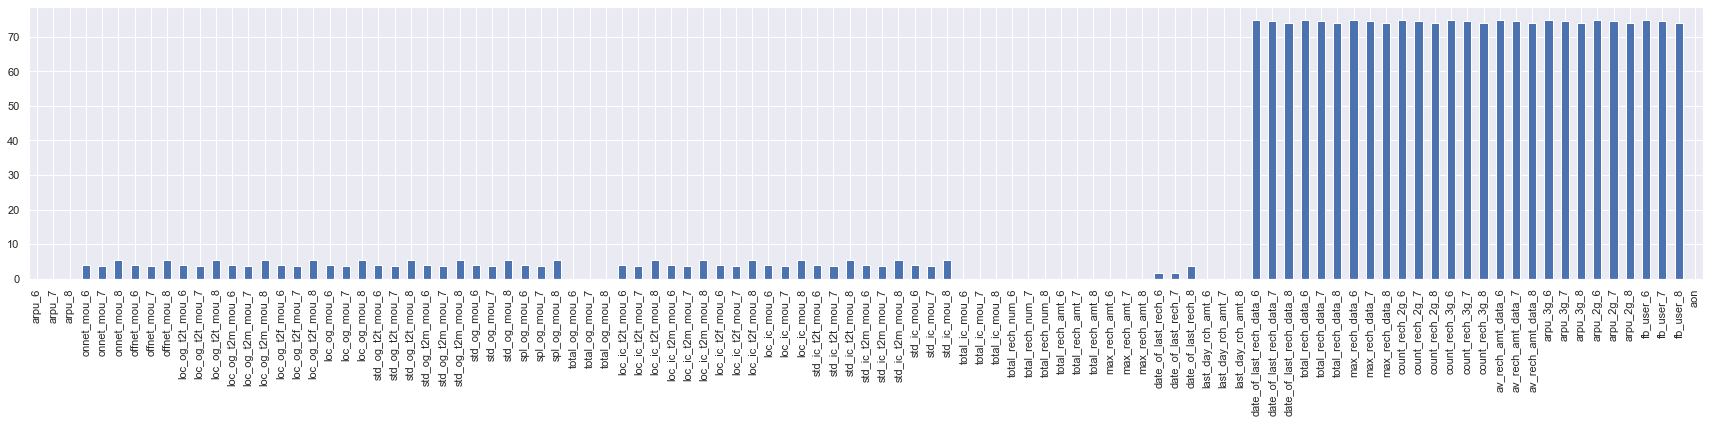

In [23]:
# null values percentage in columns in data

null_values_cols = (train_data.isnull().sum()/train_data.shape[0])*100

# null values columns in data, null values != 0
null_columns = null_values_cols[null_values_cols!=round(0,8)]

null_values_cols.plot(kind='bar',figsize=(30,5))
plt.show()

* some columns have more than 70% null values.
* most of the columns have less than 10% null values.

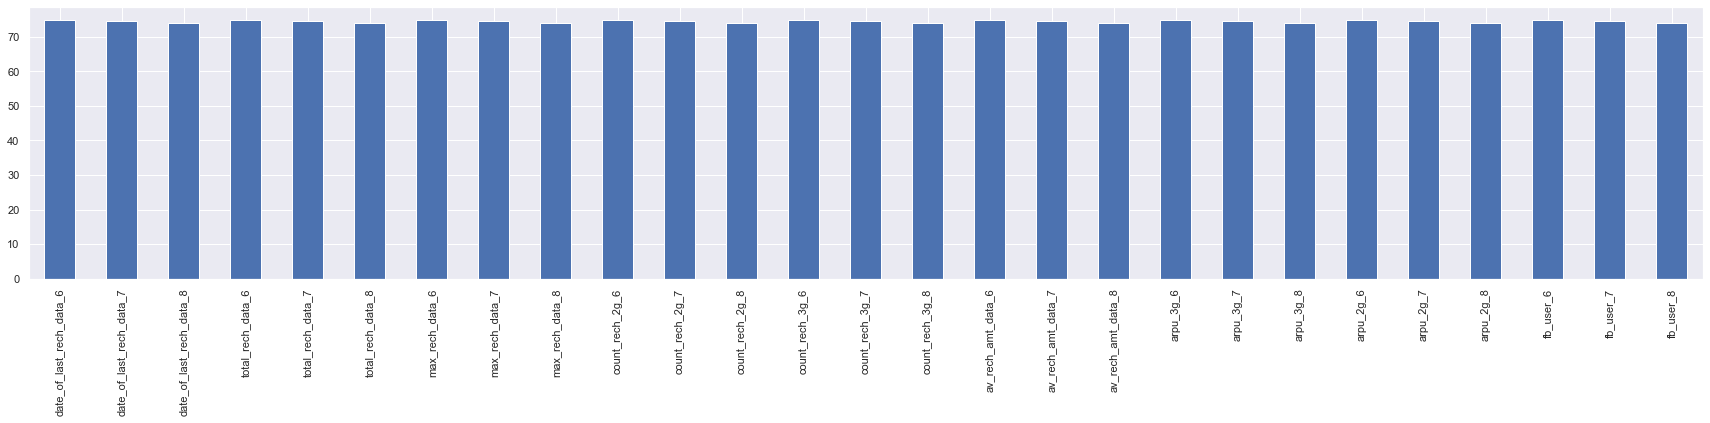

In [24]:
# columns with more than threshold of 50% for null values in data

# set threshold for null values perportion
threshold_null = 50

null_columns_abv_threshold = null_values_cols[null_values_cols>=threshold_null]
null_columns_abv_threshold_cols = null_columns_abv_threshold.index
null_columns_abv_threshold.plot(kind='bar',figsize=(30,5))

plt.show()

In [25]:
# null columns details

print(f'''
total columns with more than {threshold_null}% null values: {len(null_columns_abv_threshold_cols)}

data loss: {round(train_data[null_columns_abv_threshold_cols].size*100/train_data.size,2)}%
''')


total columns with more than 50% null values: 27

data loss: 26.21%



In [26]:
# drop columns with more than threshold null values

train_data = train_data.drop(columns=null_columns_abv_threshold_cols)

train_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
59805,20.000,457.270,0.000,NaN,57.21,0.00,NaN,132.28,0.00,NaN,57.21,0.00,NaN,132.28,0.00,NaN,0.00,0.00,NaN,189.49,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,189.49,0.00,NaN,0.66,0.00,NaN,60.93,0.00,NaN,0.00,0.00,NaN,61.59,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,61.59,0.06,0,1,2,0,0,0,0,0,0,NaN,7/27/2014,8/26/2014,0,0,0,778
32717,157.847,177.925,76.996,276.99,175.51,190.18,285.33,145.68,138.56,234.09,149.64,182.84,266.73,115.54,138.48,0.00,0.00,0.00,500.83,265.19,321.33,42.89,25.48,7.33,0.25,29.71,0.00,43.14,55.19,7.33,22.81,8.84,13.43,566.79,329.24,342.09,64.59,55.54,103.26,1007.69,433.21,282.41,2.78,6.01,0.00,1075.08,494.78,385.68,1.13,0.00,0.00,4.53,45.01,3.64,5.66,45.01,3.64,1086.23,539.79,389.33,4,5,4,200,160,130,110,110,130,6/27/2014,7/19/2014,8/22/2014,110,0,130,1322
5964,309.004,468.304,412.625,31.63,38.03,8.51,122.51,215.51,36.94,12.31,16.56,3.11,27.28,83.01,25.59,4.61,3.28,1.16,44.21,102.86,29.88,19.31,21.46,5.39,90.61,129.21,10.18,109.93,150.68,15.58,0.00,0.00,0.00,154.23,256.04,46.99,8.01,53.19,28.66,94.66,81.58,80.66,0.00,0.00,0.00,102.68,134.78,109.33,0.00,0.95,0.00,33.46,74.78,58.86,33.46,76.14,58.86,204.53,362.09,237.74,6,9,6,289,530,626,154,198,198,6/27/2014,7/24/2014,8/29/2014,0,48,198,1543
47623,154.108,60.291,265.921,53.64,12.71,49.81,114.81,40.49,239.84,53.64,12.71,49.81,114.81,40.49,237.13,0.00,0.00,0.00,168.46,53.21,286.94,0.00,0.00,0.00,0.00,0.00,1.11,0.00,0.00,1.11,0.66,0.99,2.11,169.66,54.21,290.18,88.46,0.00,33.64,173.19,60.38,494.19,0.00,0.00,10.53,261.66,60.38,538.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,261.66,61.28,538.38,6,2,8,180,70,310,90,70,50,6/19/2014,7/20/2014,8/28/2014,30,0,30,857
31881,228.004,222.476,180.528,11.46,12.99,19.28,143.51,154.64,103.03,8.66,12.99,19.28,17.09,56.79,41.36,0.31,0.00,0.23,26.08,69.79,60.88,2.79,0.00,0.00,121.73,97.84,61.39,124.53,97.84,61.39,0.00,0.00,0.00,150.64,167.64,122.31,18.09,46.11,36.41,65.51,193.03,104.49,2.69,0.00,0.11,86.31,239.14,141.03,5.11,0.00,26.51,171.24,211.53,92.29,176.36,211.53,118.81,298.23,512.79,525.01,13,17,9,271,270,172,41,50,41,6/30/2014,7/29/2014,8/29/2014,20,30,10,1072


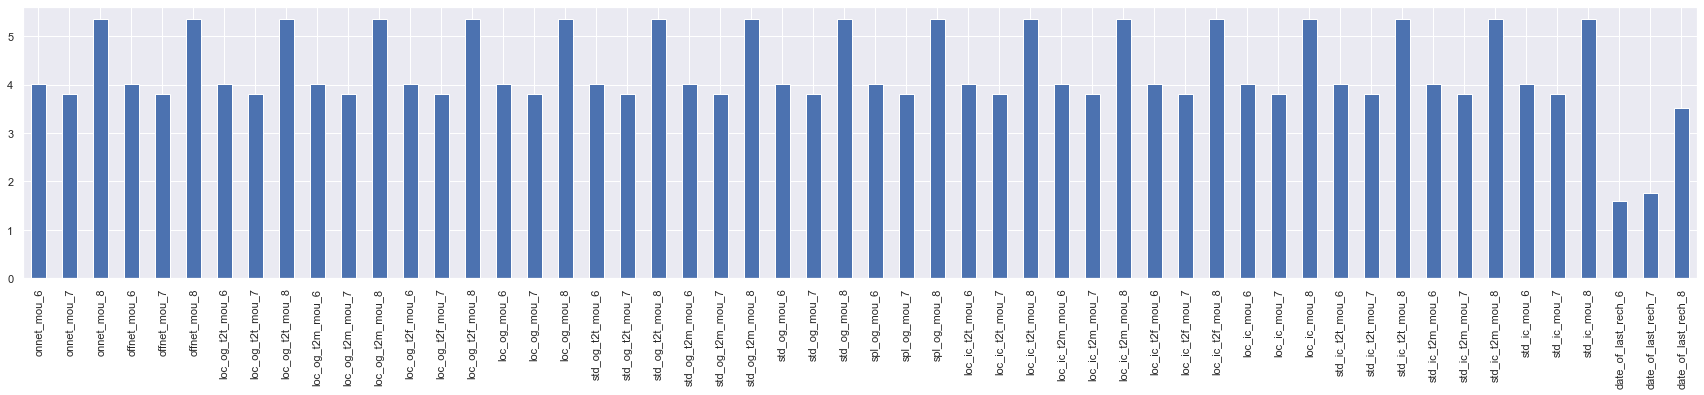

In [27]:
# null values columns in training data

null_values = (train_data.isnull().sum()*100/train_data.shape[0])
null_values = null_values[null_values!=round(0,8)]
null_values_cols = null_values.index

null_values.plot(kind='bar',figsize=(30,5))
plt.show()

* some column have same precentage of null values i.e. approx. 5% and 4%.
* some column have null percentage less than 2%.

In [28]:
# columns with null values

print(f'''
total columns left with null values: {len(null_values_cols)}

total null values in training data: 
quantity: {train_data.isna().sum().sum()}
data loss: {round(train_data.isna().sum().sum()*100/train_data.size,2)}%
''')

train_data[null_values_cols].head(10)


total columns left with null values: 54

total null values in training data: 
quantity: 129190
data loss: 3.04%



,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
59805,NaN,57.21,0.00,NaN,132.28,0.00,NaN,57.21,0.00,NaN,132.28,0.00,NaN,0.00,0.00,NaN,189.49,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.66,0.00,NaN,60.93,0.00,NaN,0.00,0.00,NaN,61.59,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,7/27/2014,8/26/2014
32717,276.99,175.51,190.18,285.33,145.68,138.56,234.09,149.64,182.84,266.73,115.54,138.48,0.00,0.00,0.00,500.83,265.19,321.33,42.89,25.48,7.33,0.25,29.71,0.00,43.14,55.19,7.33,22.81,8.84,13.43,64.59,55.54,103.26,1007.69,433.21,282.41,2.78,6.01,0.00,1075.08,494.78,385.68,1.13,0.00,0.00,4.53,45.01,3.64,5.66,45.01,3.64,6/27/2014,7/19/2014,8/22/2014
5964,31.63,38.03,8.51,122.51,215.51,36.94,12.31,16.56,3.11,27.28,83.01,25.59,4.61,3.28,1.16,44.21,102.86,29.88,19.31,21.46,5.39,90.61,129.21,10.18,109.93,150.68,15.58,0.00,0.00,0.00,8.01,53.19,28.66,94.66,81.58,80.66,0.00,0.00,0.00,102.68,134.78,109.33,0.00,0.95,0.00,33.46,74.78,58.86,33.46,76.14,58.86,6/27/2014,7/24/2014,8/29/2014
47623,53.64,12.71,49.81,114.81,40.49,239.84,53.64,12.71,49.81,114.81,40.49,237.13,0.00,0.00,0.00,168.46,53.21,286.94,0.00,0.00,0.00,0.00,0.00,1.11,0.00,0.00,1.11,0.66,0.99,2.11,88.46,0.00,33.64,173.19,60.38,494.19,0.00,0.00,10.53,261.66,60.38,538.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,6/19/2014,7/20/2014,8/28/2014
31881,11.46,12.99,19.28,143.51,154.64,103.03,8.66,12.99,19.28,17.09,56.79,41.36,0.31,0.00,0.23,26.08,69.79,60.88,2.79,0.00,0.00,121.73,97.84,61.39,124.53,97.84,61.39,0.00,0.00,0.00,18.09,46.11,36.41,65.51,193.03,104.49,2.69,0.00,0.11,86.31,239.14,141.03,5.11,0.00,26.51,171.24,211.53,92.29,176.36,211.53,118.81,6/30/2014,7/29/2014,8/29/2014
42186,20.21,5.66,13.21,45.58,96.48,70.51,20.21,5.66,13.21,38.93,26.21,52.91,6.21,13.44,15.88,65.36,45.33,82.01,0.00,0.00,0.00,0.43,2.93,1.71,0.43,2.93,1.71,0.00,53.88,0.00,78.68,62.24,38.71,332.91,406.56,464.04,198.58,212.03,311.19,610.18,680.84,813.96,0.00,0.00,0.00,35.28,39.66,34.81,35.63,72.38,38.24,6/27/2014,7/25/2014,8/12/2014
54756,82.74,NaN,NaN,156.08,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,6/15/2014,7/15/2014,NaN
67545,42.61,20.13,100.61,170.48,89.96,162.79,34.48,7.08,28.81,22.54,30.43,44.96,4.63,5.36,1.03,61.66,42.88,74.81,3.58,13.05,71.79,127.48,54.16,116.79,131.06,67.21,188.59,0.00,0.00,0.00,5.34,7.66,24.98,11.98,24.16,23.93,0.35,6.24,11.88,17.68,38.08,60.79,1.13,7.28,36.29,27.39,16.98,13.88,28.53,24.26,50.18,6/30/2014,7/27/2014,8/31/2014
54930,25.39,24.11,51.49,149.11,175.74,175.28,25.39,23.76,51.49,128.36,160.36,167.91,0.00,0.00,0.00,153.76,184.13,219.41,0.00,0.35,0.00,20.74,10.29,7.36,20.74,10.64,7.36,0.00,0.18,0.06,46.71,17.09,41.33,260.69,234.28,190.51,0.00,1.21,1.28,307.41,252.59,233.13,0.28,0.00,0.00,17.21,30.69,32.94,17.49,30.69,32.94,6/30/2014,7/30/2014,8/30/2014
62934,23.43,60.18,74.73,75.96,62.89,62.38,5.69,13.81,14.09,67.06,62.28,52.59,0.00,0.00,0.00,72.76,76.09,66.69,17.73,46.36,60.63,8.89,0.61,9.78,26.63,46.98,70.41,0.00,0.68,0.00,60.29,85.49,46.06,168.24,220.73,169.81,0.00,0.00,0.00,228.54,306.23,215.88,42.30,13.01,0.03,5.

* small amount of null data, so can be easily imputed with majority values -- mode and median.

In [29]:
# null columns with object values
null_cat_cols = train_data.select_dtypes('object').columns
print('null columns with object values:',len(null_cat_cols))

# columns with number(float) values
null_num_cols = train_data.select_dtypes(np.number).columns
print('null columns with number values:',len(null_num_cols))

null columns with object values: 3
null columns with number values: 73


In [30]:
# columns with object values - impute with mode
train_data[null_cat_cols] = train_data[null_cat_cols].fillna(train_data[null_cat_cols].mode().iloc[0])

# columns with number(float) values - impute with median
train_data[null_num_cols] = train_data[null_num_cols].fillna(train_data[null_num_cols].median())

In [31]:
# null values in data 

print(f'''
null values in data: {train_data.isna().sum().sum()}
''')


null values in data: 0



### datatype treatment

* convert object values to integers

In [32]:
# cat cols

cat_cols = train_data.select_dtypes('object').columns

print('total object type columns:', len(cat_cols))

train_data[cat_cols].head()

total object type columns: 3


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
59805,6/30/2014,7/27/2014,8/26/2014
32717,6/27/2014,7/19/2014,8/22/2014
5964,6/27/2014,7/24/2014,8/29/2014
47623,6/19/2014,7/20/2014,8/28/2014
31881,6/30/2014,7/29/2014,8/29/2014


In [33]:
# extract date frmo MM/DD/YYYY columns

# take DD from MM/DD//YYYY format
for col in cat_cols:
    train_data[col] = train_data[col].apply(lambda x: x.split("/")[1])
    
# convert datatype of all numbers to integer format
train_data[cat_cols] = train_data[cat_cols].astype('int')

train_data[cat_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
59805,30,27,26
32717,27,19,22
5964,27,24,29
47623,19,20,28
31881,30,29,29


In [34]:
# data info

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55999 entries, 59805 to 38408
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   arpu_6               55999 non-null  float64
 1   arpu_7               55999 non-null  float64
 2   arpu_8               55999 non-null  float64
 3   onnet_mou_6          55999 non-null  float64
 4   onnet_mou_7          55999 non-null  float64
 5   onnet_mou_8          55999 non-null  float64
 6   offnet_mou_6         55999 non-null  float64
 7   offnet_mou_7         55999 non-null  float64
 8   offnet_mou_8         55999 non-null  float64
 9   loc_og_t2t_mou_6     55999 non-null  float64
 10  loc_og_t2t_mou_7     55999 non-null  float64
 11  loc_og_t2t_mou_8     55999 non-null  float64
 12  loc_og_t2m_mou_6     55999 non-null  float64
 13  loc_og_t2m_mou_7     55999 non-null  float64
 14  loc_og_t2m_mou_8     55999 non-null  float64
 15  loc_og_t2f_mou_6     55999 non-n

### outlier treatment

* drop columns with high outliers percentage.
* drop rows through columns with very low outliers percentage.

In [35]:
# outlier checking, visulisation, and update dataframe

class Outlier:
    '''takes dataframe and columns as arguments anc check for outliers'''
    def __init__(self,data,column_name,Q1=0.25,Q2=0.75):
                
        self.column_name = column_name
        # copy dataframe
        self.df = data.copy()
        self.q1 = Q1
        self.q2 = Q2
        
        # set quantiles
        Q1=self.df[self.column_name].quantile(self.q1)
        Q3=self.df[self.column_name].quantile(self.q2)
        IQR=Q3-Q1
        
        # outlier values
        self.df_outlier = self.df[((self.df[self.column_name] < (Q1 - 1.5 * IQR)) | (self.df[self.column_name] > (Q3 + 1.5 * IQR)))]
        # percent of outliers values in dataframe
        self.outlier_prct = round(self.df_outlier.size*100/self.df.size,2)
        # update dataframe by removing outliers from column
        self.df_new = self.df[((self.df[self.column_name] >= (Q1 - 1.5 * IQR)) & (self.df[self.column_name] <= (Q3 + 1.5 * IQR)))]
        
    @property
    def check(self):
        
        '''returns outliers percentage in column'''
        return self.outlier_prct
    
    @property
    def visualize(self):
        
        '''plots boxplot of column'''
        self.df_outlier[self.column_name].plot(kind='box',vert=False,figsize=(30,10),rot=0)
        plt.show()
        
    @property
    def new_dataframe(self):
        
        '''return new dataframe without outliers'''
        return self.df_new

In [36]:
# description of data

train_data.describe().loc[['min','25%','50%','75%','max'],:]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
min,-2258.7090,-1289.715,-945.808,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,180.0
25%,93.3950,86.884,83.596,8.11,7.24,7.43,36.92,33.610,34.340,1.91,1.86,1.93,10.78,10.88,11.09,0.00,0.00,0.00,18.58,18.835,19.09,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,44.59,42.780,38.610,3.34,3.53,3.73,18.58,19.735,20.64,0.00,0.00,0.00,32.48,34.53,35.42,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.08,0.19,38.38,41.160,38.030,3.0,3.0,3.0,110.0,100.0,90.0,30.0,30.0,30.0,21.0,23.0,24.0,0.0,0.0,0.0,467.5
50%,197.0500,191.481,191.736,34.18,32.23,32.11,96.00,91.330,91.390,11.83,11.51,11.73,40.79,39.79,40.19,0.00,0.00,0.00,64.74,62.980,63.28,0.00,0.00,0.00,3.990,3.690,3.26,11.640,11.210,10.54,0.00,0.00,0.00,144.79,141.240,138.080,15.74,15.78,16.06,56.20,56.730,58.09,0.88,0.91,0.93,91.99,92.24,94.04,0.00,0.00,0.00,2.05,2.08,2.03,5.91,5.99,5.81,114.54,115.980,114.710,6.0,6.0,5.0,228.0,220.0,223.0,110.0,110.0,98.0,27.0,27.0,27.0,30.0,30.0,30.0,867.0
75%,370.1775,365.494,369.554,113.18,108.35,106.06,222.64,218.295,216.325,38.65,37.64,37.17,104.99,103.07,102.76,1.83,1.86,1.73,161.32,157.585,156.85,26.78,27.34,24.81,48.835,49.745,45.94,133.795,137.975,130.98,2.15,3.33,3.51,373.53,378.345,369.875,44.89,43.81,43.63,126.92,126.590,127.17,7.56,7.58,7.24,201.29,197.80,197.65,3.61,3.74,3.38,13.86,14.96,13.96,25.13,26.53,25.41,251.06,249.435,249.335,9.0,10.0,9.0,437.5,430.0,435.0,120.0,128.0,144.0,29.0,30.0,30.0,110.0,110.0,130.0,1808.0
max,27731.0880,35145.834,33543.624,7376.71,8011.91,10752.56,5905.14,6740.080,14007.340,6431.33,7400.66,10752.56,4696.83,4557.14,4961.33,570.43,602.69,588.29,10643.38,7674.780,11039.91,7366.58,7983.16,8014.43,5622.580,6622.540,13950.04,7498.030,8086.440,13980.06,1023.21,2372.51,954.51,10674.03,8224.160,14043.060,5315.59,9324.66,10696.23,4450.74,4455.830,6274.19,1872.34,1983.01,1676.58,5525.34,9669.91,10830.16,3336.38,4708.71,3930.24,3044.44,3470.38,3008.96,3929.24,6745.76,3930.24,7074.59,9699.010,10830.380,170.0,138.0,127.0,35190.0,40335.0,45320.0,4010.0,3299.0,3399.0,30.0,31.0,31.0,4010.0,3100.0,3399.0,4319.0


* some columns have almost all values as 0.

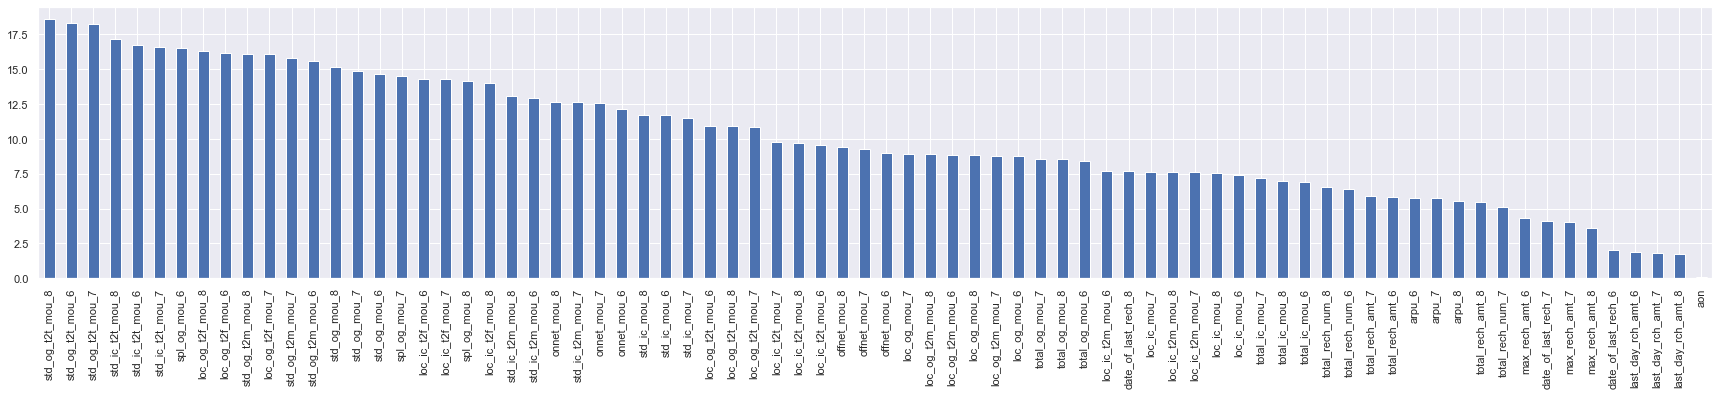

In [37]:
# find percentage of outlier in columns

outlier_cols = dict()

for column in train_data.columns:
    instance = Outlier(train_data,column)
    outlier_prct = instance.check
    if outlier_prct>0:
        outlier_cols[column] = outlier_prct
    
plt.figure(figsize=(25,25))

outlier_data = pd.Series(outlier_cols)
outlier_data.sort_values(ascending=False).plot(kind='bar',figsize=(30,5))
plt.show()

* columns have outliers from 0.8% to 22.%.
* drop columns with outliers percentage above threshhold.
* drop rows with outliers percentage above threshhold so that minimal values are dropped.

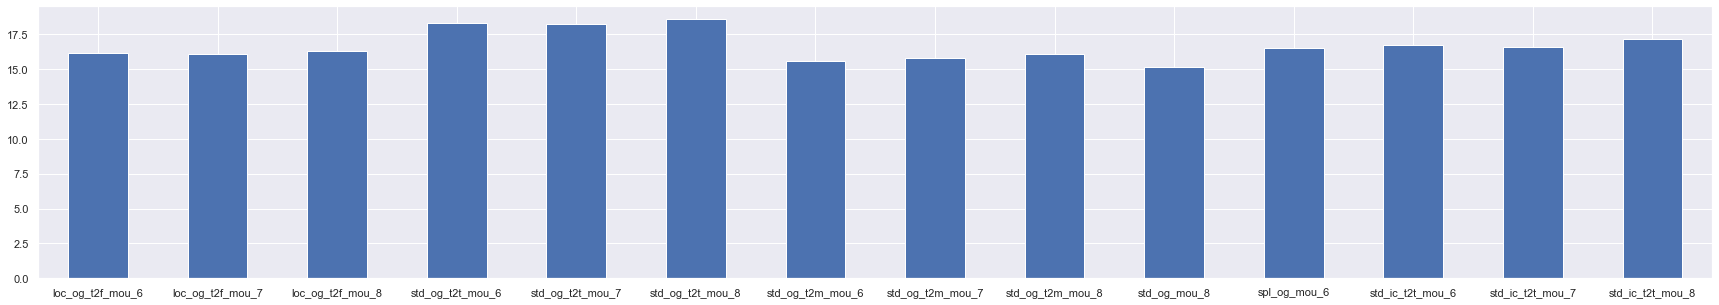

In [38]:
# columns with outlier percentage above threhold

threshold_max_outlier = 15

outliers_above_threshold = outlier_data[outlier_data>=threshold_max_outlier]
outliers_above_threshold_cols = outliers_above_threshold.keys()
outlier_data[outliers_above_threshold_cols].plot(kind='bar',figsize=(30,5))
plt.xticks(rotation='horizontal')
plt.show()

In [39]:
# statical description of columns with outlier percentage above threhold

train_data[outliers_above_threshold_cols].describe(percentiles=[0.75,0.90,0.99])

,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_8,spl_og_mou_6,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,3.585540,3.635619,3.480495,76.396305,79.872393,78.581538,84.541891,88.283852,86.060976,166.064118,3.775602,8.896875,9.425469,9.294144
std,12.944654,13.085021,12.821542,248.002132,260.701119,260.916070,246.897037,262.317779,265.420893,402.666184,15.235648,48.719268,53.958970,50.888335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.990000,3.690000,3.260000,10.540000,0.000000,0.000000,0.000000,0.000000
75%,1.830000,1.860000,1.730000,26.780000,27.340000,24.810000,48.835000,49.745000,45.940000,130.980000,2.150000,3.610000,3.740000,3.380000
90%,8.990000,9.160000,8.710000,200.716000,210.494000,207.376000,228.388000,236.964000,232.896000,525.514000,10.160000,18.980000,19.714000,18.930000
99%,54.110600,54.862000,53.761400,1187.220600,1255.508400,1244.662600,1230.385200,1253.867000,1198.349800,1893.982200,50.112400,132.891000,145.412400,145.763400
max,570.430000,602.690000,588.290000,7366.580000,7983.160000,8014.430000,5622.580000,6622.540000,13950.040000,13980.060000,1023.210000,3336.380000,4708.710000,3930.240000


In [40]:
# outliers details

print(f'''
total columns with more than {threshold_max_outlier}% outliers: {len(outliers_above_threshold_cols)}

data loss: {round(train_data[outliers_above_threshold_cols].size*100/train_data.size,2)}%

''')


total columns with more than 15% outliers: 14

data loss: 18.42%




In [41]:
# drop columns with outliers above threshold 

train_data = train_data.drop(columns=outliers_above_threshold_cols)

train_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
59805,20.000,457.270,0.000,34.18,57.21,0.00,96.00,132.28,0.00,11.83,57.21,0.00,40.79,132.28,0.00,64.74,189.49,0.00,11.64,0.00,0.00,0.00,0.00,189.49,0.00,15.74,0.66,0.00,56.20,60.93,0.00,0.88,0.00,0.00,91.99,61.59,0.00,2.05,0.00,0.00,5.91,0.00,0.00,0.00,61.59,0.06,0,1,2,0,0,0,0,0,0,30,27,26,0,0,0,778
32717,157.847,177.925,76.996,276.99,175.51,190.18,285.33,145.68,138.56,234.09,149.64,182.84,266.73,115.54,138.48,500.83,265.19,321.33,43.14,55.19,8.84,13.43,566.79,329.24,342.09,64.59,55.54,103.26,1007.69,433.21,282.41,2.78,6.01,0.00,1075.08,494.78,385.68,4.53,45.01,3.64,5.66,45.01,3.64,1086.23,539.79,389.33,4,5,4,200,160,130,110,110,130,27,19,22,110,0,130,1322
5964,309.004,468.304,412.625,31.63,38.03,8.51,122.51,215.51,36.94,12.31,16.56,3.11,27.28,83.01,25.59,44.21,102.86,29.88,109.93,150.68,0.00,0.00,154.23,256.04,46.99,8.01,53.19,28.66,94.66,81.58,80.66,0.00,0.00,0.00,102.68,134.78,109.33,33.46,74.78,58.86,33.46,76.14,58.86,204.53,362.09,237.74,6,9,6,289,530,626,154,198,198,27,24,29,0,48,198,1543
47623,154.108,60.291,265.921,53.64,12.71,49.81,114.81,40.49,239.84,53.64,12.71,49.81,114.81,40.49,237.13,168.46,53.21,286.94,0.00,0.00,0.99,2.11,169.66,54.21,290.18,88.46,0.00,33.64,173.19,60.38,494.19,0.00,0.00,10.53,261.66,60.38,538.38,0.00,0.00,0.00,0.00,0.90,0.00,261.66,61.28,538.38,6,2,8,180,70,310,90,70,50,19,20,28,30,0,30,857
31881,228.004,222.476,180.528,11.46,12.99,19.28,143.51,154.64,103.03,8.66,12.99,19.28,17.09,56.79,41.36,26.08,69.79,60.88,124.53,97.84,0.00,0.00,150.64,167.64,122.31,18.09,46.11,36.41,65.51,193.03,104.49,2.69,0.00,0.11,86.31,239.14,141.03,171.24,211.53,92.29,176.36,211.53,118.81,298.23,512.79,525.01,13,17,9,271,270,172,41,50,41,30,29,29,20,30,10,1072


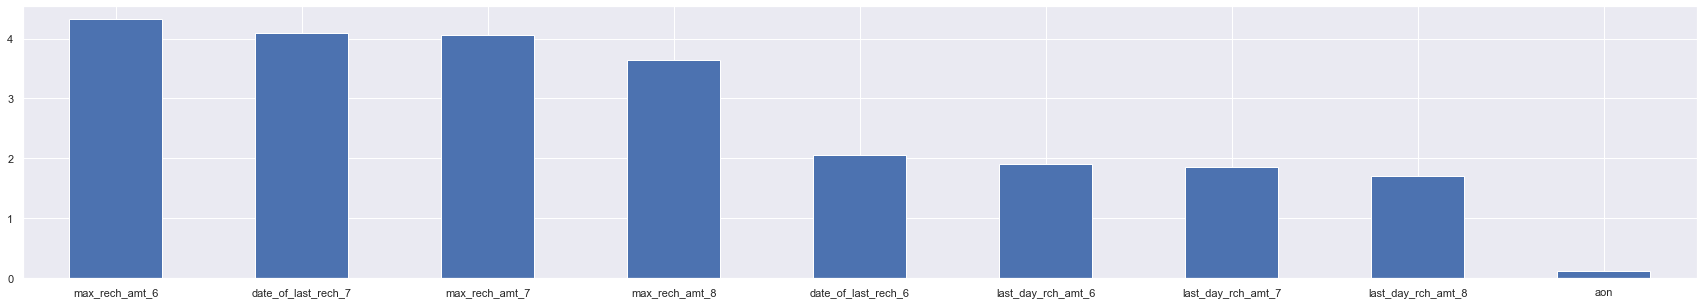

In [42]:
# columns with outlier percentage below threhold of 5%

threshold_min_outlier = 5

outliers_less_threshold = outlier_data.sort_values(ascending=False)[outlier_data<=threshold_min_outlier]
outliers_less_threshold_cols = list(outliers_less_threshold.keys())
outliers_less_threshold.plot(kind='bar',figsize=(30,5))
plt.xticks(rotation='horizontal')
plt.show()

* very less loss in rmoving outliers rows. 

### collinearity treament

* remove columns with very high colinearity with other columns.

In [43]:
# detect if any two feature parameters are highly correlated, more than threshold

threshold_correlation = 0.90

corr = train_data.corr()

corr1 = corr[abs(corr)>=threshold_correlation]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations

corr_result = corr2.stack()

high_corr = corr_result[(abs(corr_result) >= threshold_correlation)]

high_corr

arpu_6        total_rech_amt_6    0.952476
arpu_7        total_rech_amt_7    0.957038
arpu_8        total_rech_amt_8    0.959888
loc_ic_mou_6  total_ic_mou_6      0.901316
dtype: float64

In [44]:
# columns with high correlation

high_corr_cols = list(set([col for corr_col in high_corr.index for col in corr_col]))

train_data[high_corr_cols].head()

,total_rech_amt_7,arpu_6,arpu_7,loc_ic_mou_6,total_rech_amt_6,arpu_8,total_rech_amt_8,total_ic_mou_6
59805,0,20.000,457.270,91.99,0,0.000,0,0.00
32717,160,157.847,177.925,1075.08,200,76.996,130,1086.23
5964,530,309.004,468.304,102.68,289,412.625,626,204.53
47623,70,154.108,60.291,261.66,180,265.921,310,261.66
31881,270,228.004,222.476,86.31,271,180.528,172,298.23


In [45]:
# high correlation columns effect

print(f'''
columns with more than {threshold_correlation}% threshold correlation: {len(high_corr_cols)}      

data loss: {round(train_data[high_corr_cols].size*100/train_data.size,2)}%
''')


columns with more than 0.9% threshold correlation: 8      

data loss: 12.9%



In [46]:
# drop columns with high correlation

train_data = train_data.drop(columns=high_corr_cols)

train_data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
59805,34.18,57.21,0.00,96.00,132.28,0.00,11.83,57.21,0.00,40.79,132.28,0.00,64.74,189.49,0.00,11.64,0.00,0.00,0.00,0.00,189.49,0.00,15.74,0.66,0.00,56.20,60.93,0.00,0.88,0.00,0.00,61.59,0.00,2.05,0.00,0.00,5.91,0.00,0.00,61.59,0.06,0,1,2,0,0,0,30,27,26,0,0,0,778
32717,276.99,175.51,190.18,285.33,145.68,138.56,234.09,149.64,182.84,266.73,115.54,138.48,500.83,265.19,321.33,43.14,55.19,8.84,13.43,566.79,329.24,342.09,64.59,55.54,103.26,1007.69,433.21,282.41,2.78,6.01,0.00,494.78,385.68,4.53,45.01,3.64,5.66,45.01,3.64,539.79,389.33,4,5,4,110,110,130,27,19,22,110,0,130,1322
5964,31.63,38.03,8.51,122.51,215.51,36.94,12.31,16.56,3.11,27.28,83.01,25.59,44.21,102.86,29.88,109.93,150.68,0.00,0.00,154.23,256.04,46.99,8.01,53.19,28.66,94.66,81.58,80.66,0.00,0.00,0.00,134.78,109.33,33.46,74.78,58.86,33.46,76.14,58.86,362.09,237.74,6,9,6,154,198,198,27,24,29,0,48,198,1543
47623,53.64,12.71,49.81,114.81,40.49,239.84,53.64,12.71,49.81,114.81,40.49,237.13,168.46,53.21,286.94,0.00,0.00,0.99,2.11,169.66,54.21,290.18,88.46,0.00,33.64,173.19,60.38,494.19,0.00,0.00,10.53,60.38,538.38,0.00,0.00,0.00,0.00,0.90,0.00,61.28,538.38,6,2,8,90,70,50,19,20,28,30,0,30,857
31881,11.46,12.99,19.28,143.51,154.64,103.03,8.66,12.99,19.28,17.09,56.79,41.36,26.08,69.79,60.88,124.53,97.84,0.00,0.00,150.64,167.64,122.31,18.09,46.11,36.41,65.51,193.03,104.49,2.69,0.00,0.11,239.14,141.03,171.24,211.53,92.29,176.36,211.53,118.81,512.79,525.01,13,17,9,41,50,41,30,29,29,20,30,10,1072


### class imbalance treatment

* equal share of all class labels.

In [47]:
# samples of custmer types in dataset

round(data_churn.value_counts(normalize=True)*100,2)

0    89.81
1    10.19
Name: churn_probability, dtype: float64

* almost 90% of customers are in non-churn category.

In [48]:
# SMOTE class balancing

smt = imblearn.over_sampling.SMOTE()
X_train, y_train = smt.fit_resample(train_data, train_data_churn)

y_train.value_counts()*100/len(y_train)

1    50.0
0    50.0
Name: churn_probability, dtype: float64

* classes are now equally balanced.

#### VALIDATION DATA -- Feature Engineering

In [49]:
# dataset

val_data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
3425,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.702,563.600,-5.150,26.23,520.31,0.00,0.06,824.91,1.56,0.81,0.15,0.00,26.29,24.91,0.00,0.00,24.24,0.00,0.00,45.91,0.00,0.00,0.00,0.0,0.00,9.39,0.00,0.00,70.16,0.00,0.00,487.73,0.00,0.00,717.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1205.04,0.00,0.0,0.0,0.0,0.00,72.73,1.56,0.0,0.0,0.0,0.00,1347.94,1.56,0.00,19.21,0.00,0.00,37.51,1.40,0.0,0.00,0.00,0.00,56.73,1.40,0.00,8.63,0.00,0.00,4.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,13.56,0.00,0.00,84.99,3.73,0.0,0.0,0.0,0.0,14.69,2.33,0.00,0.0,0.0,5,19,2,40,642,0,20,54,0,6/27/2014,7/31/2014,8/26/2014,0,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,846,0.00,0.00,0.0
33067,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,772.527,569.952,248.855,437.29,280.06,25.63,1178.14,402.46,97.38,71.13,83.26,69.81,102.63,183.01,123.01,162.23,87.53,0.00,559.16,61.43,0.00,0.43,1.85,0.0,0.00,7.23,4.99,721.83,150.81,0.00,236.43,108.58,0.00,554.54,240.11,0.00,0.0,0.0,0.0,0.0,0.0,0.0,790.98,348.69,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,1512.81,499.51,0.00,170.39,70.96,0.00,349.56,37.76,0.00,0.0,0.00,0.00,519.96,108.73,0.00,7.21,3.23,0.00,34.13,30.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.34,33.46,0.00,562.06,143.19,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.75,1.0,0.0,11,9,7,943,772,200,128,128,50,6/27/2014,7/27/2014,8/29/2014,128,110,0,6/26/2014,NaN,8/25/2014,1.0,NaN

**Null values Imputation**

In [50]:
# null values

val_data.isna().sum().sum()

365471

In [51]:
# null columns with object values
null_cat_cols = val_data.select_dtypes('object').columns
print('null columns with categorical values:',len(null_cat_cols))

# columns with number(float) values
null_num_cols = val_data.select_dtypes(np.number).columns
print('null columns with number values:',len(null_num_cols))

null columns with categorical values: 9
null columns with number values: 161


In [52]:
# columns with object values - impute with mode
val_data[null_cat_cols] = val_data[null_cat_cols].fillna(val_data[null_cat_cols].mode().iloc[0])

# columns with number(float) values - impute with median
val_data[null_num_cols] = val_data[null_num_cols].fillna(val_data[null_num_cols].median())

**DataType Conversion**

In [53]:
# columns selection

# extract columns
val_data = val_data[X_train.columns]
val_data.head()

# categorical columns
cat_cols = val_data.select_dtypes('object').columns
val_data[cat_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
3425,6/27/2014,7/31/2014,8/26/2014
33067,6/27/2014,7/27/2014,8/29/2014
52420,6/25/2014,7/8/2014,8/26/2014
5220,6/8/2014,7/25/2014,8/18/2014
33958,6/14/2014,7/29/2014,8/24/2014


In [54]:
# extract date frmo MM/DD/YYYY columns

# take DD from MM/DD//YYYY format
for col in cat_cols:
    val_data[col] = val_data[col].apply(lambda x: x.split("/")[1] if isinstance(x, str) else x)

val_data[cat_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
3425,27,31,26
33067,27,27,29
52420,25,8,26
5220,8,25,18
33958,14,29,24


In [55]:
# convert datatype of all numbers to integer format

val_data[cat_cols] = val_data[cat_cols].astype('int')

val_data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
3425,26.23,520.31,0.00,0.06,824.91,1.56,0.00,24.24,0.00,0.00,45.91,0.00,0.00,70.16,0.00,0.00,1205.04,72.73,1.56,0.00,1347.94,1.56,0.00,19.21,0.00,0.00,37.51,1.40,0.0,0.00,0.00,56.73,1.40,0.00,4.93,0.0,0.00,13.56,0.00,84.99,3.73,5,19,2,20,54,0,27,31,26,0,10,0,846
33067,437.29,280.06,25.63,1178.14,402.46,97.38,162.23,87.53,0.00,559.16,61.43,0.00,721.83,150.81,0.00,790.98,348.69,0.00,0.00,1512.81,499.51,0.00,170.39,70.96,0.00,349.56,37.76,0.00,0.0,0.00,0.00,108.73,0.00,34.13,30.23,0.0,41.34,33.46,0.00,143.19,0.00,11,9,7,128,128,50,27,27,29,128,110,0,840
52420,106.19,27.24,0.00,69.56,1.09,0.88,0.00,0.00,0.00,0.98,0.00,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.98,0.00,0.00,5.51,0.00,0.00,12.33,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,7,1,2,110,50,0,25,8,26,50,50,0,780
5220,1.36,0.00,0.00,3.53,0.36,0.00,1.36,0.00,0.00,1.93,0.00,0.00,3.29,0.00,0.00,0.00,0.00,12.29,0.00,4.89,12.29,0.00,20.94,0.00,0.38,4.14,5.41,9.84,0.0,0.00,2.95,5.41,13.18,1.45,0.00,0.0,1.45,0.00,0.00,5.41,13.18,2,6,1,30,23,98,8,25,18,0,0,98,3241
33958,7.98,30.09,19.36,119.89,174.11,32.33,1.11,1.58,2.74,17.96,28.28,2.61,19.08,29.86,5.36,108.79,152.38,21.96,0.00,127.88,204.21,45.14,1.43,5.04,11.28,19.21,25.49,2.16,0.0,2.06,0.00,32.61,13.44,0.00,3.23,0.0,7.38,16.38,11.49,48.99,24.94,2,8,3,0,128,0,14,29,24,0,0,0,1987


In [56]:
# target and variables in validation dataset

X_val = val_data
y_val = val_data_churn

------------

# Data Modelling

In [57]:
# scaling -- minmax scaling

data_cols = X_train.columns

scaler = MinMaxScaler()

# training
X_train[data_cols] = scaler.fit_transform(X_train[data_cols])

# validation
X_val[data_cols] = scaler.transform(X_val[data_cols])

### extract important features

In [58]:
# creating logistics regresion model for RFE

logistics_model_rfe = LogisticRegression(random_state=100)

logistics_model_rfe.fit(X_train,y_train)

# predict on train dataset
y_train_predict = logistics_model_rfe.predict(X_train)

**Recursive feature elimination to extract important features**

In [59]:
# columns in data

print('columns in data:',len(data_cols))

columns in data: 54


In [60]:
# select most significant features using RFE

requierd_features = 25

rfe=RFE(logistics_model_rfe,n_features_to_select=requierd_features).fit(X_train,y_train)

# important features from linear regression model using RFE
useful_features = list(X_train.columns[rfe.support_])

# non-important features
non_useful_features = X_train.columns[~rfe.support_]

In [61]:
# useful features

print('useful features:',len(useful_features))

useful features: 25


In [62]:
# rank of useful features with logistics regression model

sorted(list(zip(useful_features,rfe.ranking_)), key=lambda x: x[1])

[('onnet_mou_6', 1),
 ('onnet_mou_7', 1),
 ('onnet_mou_8', 1),
 ('offnet_mou_6', 1),
 ('offnet_mou_7', 1),
 ('offnet_mou_8', 1),
 ('loc_og_mou_8', 1),
 ('total_og_mou_6', 1),
 ('loc_ic_t2t_mou_7', 1),
 ('loc_ic_t2f_mou_7', 1),
 ('loc_ic_mou_7', 1),
 ('std_ic_mou_7', 1),
 ('total_ic_mou_7', 1),
 ('total_ic_mou_8', 1),
 ('max_rech_amt_8', 1),
 ('spl_og_mou_8', 4),
 ('last_day_rch_amt_8', 6),
 ('loc_og_t2t_mou_8', 9),
 ('total_rech_num_8', 13),
 ('loc_og_t2m_mou_8', 16),
 ('loc_ic_t2f_mou_8', 17),
 ('std_og_mou_7', 20),
 ('total_og_mou_7', 24),
 ('total_og_mou_8', 28),
 ('loc_ic_t2m_mou_8', 29)]

In [63]:
# stat model function

def stat_model_func(columns):

    global X_train,y_train
    X_train_rfe_temp=X_train[columns] # create dataframe from rfe useful feature
    X_train_rfe_sm_temp=sm.add_constant(X_train_rfe_temp) # add intercept
    stat_model_temp=sm.GLM(y_train,X_train_rfe_sm_temp,family=sm.families.Binomial()).fit() # create model using GL model
    return stat_model_temp

In [64]:
# variation inflation factor

def vif_func(columns):
    
    global X_train
    vif_temp=pd.DataFrame() # create empty dataframe
    X_train_rfe_temp=X_train[columns] # create rfe useful feature in dataframe
    X_train_rfe_sm_temp=sm.add_constant(X_train_rfe_temp) # add intercept
    vif_temp['Features']=X_train_rfe_sm_temp.columns # add useful feature names
    vif_temp['VIF']=[round(variance_inflation_factor(X_train_rfe_sm_temp.values,i),2) for i in range(X_train_rfe_sm_temp.shape[1])] # add vif score of the featue with other featueres
    vif_temp = vif_temp.sort_values(by='VIF',ascending=False) # sort by vif score
    return vif_temp

**Statistics Model**

In [65]:
# create stat model

stat_model_01 = stat_model_func(useful_features)
stat_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100518
Model:                            GLM   Df Residuals:                   100492
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41875.
Date:                Wed, 18 Jan 2023   Deviance:                       83751.
Time:                        01:14:42   Pearson chi2:                 4.76e+15
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4248
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6589      0.017     37.838      0.000       0.625       0.693
onnet_mou_6           16.5445      1.285     12.880      0.000      14.027      19.062
onnet_mou_7           18.6770      1.946      9.599      0.000      14.864      22.490
onnet_mou_8          143.5703      2.755     52.116      0.000     138.171     148.970
offnet_mou_6          12.1226      1.015     11.948      0.000      10.134      14.111
offnet_mou_7          15.9092      1.608      9.894      0.000      12.758      19.061
offnet_mou_8         190.0911      3.524     53.935      0.000     183.183     196.999
loc_og_t2t_mou_8    -255.0589     13.465    -18.943      0.000    -281.450    -228.668
loc_og_t2m_mou_8    -120.1969      6.313    -19.039      0.000    -132.570    -107.823
loc_og_mou_8         233.1962     13.447     17.342      0.000     206.841     259.551
std_og_mou_7           4.5445      0.949      4.788      0.000       2.684       6.405
spl_og_mou_8          -2.3055      0.929     -2.481      0.013      -4.127      -0.484
total_og_mou_6       -18.5801      1.770    -10.497      0.000     -22.049     -15.111
total_og_mou_7       -16.1449      2.041     -7.911      0.000     -20.145     -12.145
total_og_mou_8      -198.0378      3.492    -56.710      0.000    -204.882    -191.193
loc_ic_t2t_mou_7       0.3834      2.001      0.192      0.848      -3.539       4.306
loc_ic_t2m_mou_8     -13.3872      2.078     -6.442      0.000     -17.460      -9.314
loc_ic_t2f_mou_7      -0.3138      1.434     -0.219      0.827      -3.124       2.496
loc_ic_t2f_mou_8     -39.0240      2.326    -16.779      0.000     -43.582     -34.466
loc_ic_mou_7          23.5209      2.622      8.969      0.000      18.381      28.661
std_ic_mou_7          11.7304      1.854      6.327      0.000       8.096      15.364
total_ic_mou_7        -0.6904      2.271     -0.304      0.761      -5.141       3.760
total_ic_mou_8       -54.2699      2.113    -25.683      0.000     -58.411     -50.128
total_rech_num_8     -12.2368      0.306    -39.946      0.000     -12.837     -11.636
max_rech_amt_8        -6.0058      0.411    -14.609      0.000      -6.812      -5.200
last_day_rch_amt_8   -20.2567      0.609    -33.273      0.000     -21.450     -19.063
======================================================================================
"""

* some columns have very high p-values.

In [66]:
# p-values of features

stat_model_01.pvalues.sort_values(ascending=False)[:5] # top 5 p-values columns

loc_ic_t2t_mou_7    0.848087
loc_ic_t2f_mou_7    0.826723
total_ic_mou_7      0.761084
spl_og_mou_8        0.013116
std_og_mou_7        0.000002
dtype: float64

In [67]:
# remove column from useful features -- highest p-value

high_p_value_col = stat_model_01.pvalues.sort_values(ascending=False).index[0]

useful_features.remove(high_p_value_col)

print(high_p_value_col,': column removed')

loc_ic_t2t_mou_7 : column removed


In [68]:
# check vif

vif_01 = vif_func(useful_features)
vif_01[:10]

,Features,VIF
9,loc_og_mou_8,385.58
8,loc_og_t2m_mou_8,156.73
7,loc_og_t2t_mou_8,147.42
13,total_og_mou_7,99.47
12,total_og_mou_6,50.17
14,total_og_mou_8,46.64
5,offnet_mou_7,39.59
2,onnet_mou_7,38.68
4,offnet_mou_6,23.82
1,onnet_mou_6,23.01


In [69]:
# remove column from useful features -- high VIF value

high_vif_value_col = vif_01['Features'].iloc[0]

useful_features.remove(high_vif_value_col)

print(high_vif_value_col,': column removed')

loc_og_mou_8 : column removed


In [70]:
# create stat model

stat_model_02 = stat_model_func(useful_features)
stat_model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100518
Model:                            GLM   Df Residuals:                   100494
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42020.
Date:                Wed, 18 Jan 2023   Deviance:                       84041.
Time:                        01:14:49   Pearson chi2:                 7.14e+15
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4232
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6787      0.017     38.864      0.000       0.644       0.713
onnet_mou_6           16.2139      1.282     12.643      0.000      13.700      18.727
onnet_mou_7           18.1506      1.949      9.311      0.000      14.330      21.971
onnet_mou_8          155.4248      2.653     58.587      0.000     150.225     160.624
offnet_mou_6          11.8837      1.013     11.728      0.000       9.898      13.870
offnet_mou_7          15.3588      1.607      9.559      0.000      12.210      18.508
offnet_mou_8         206.1688      3.363     61.310      0.000     199.578     212.760
loc_og_t2t_mou_8     -28.1137      3.269     -8.599      0.000     -34.521     -21.706
loc_og_t2m_mou_8     -13.1681      1.194    -11.028      0.000     -15.508     -10.828
std_og_mou_7           3.8757      0.943      4.112      0.000       2.028       5.723
spl_og_mou_8          -2.0848      0.931     -2.239      0.025      -3.909      -0.260
total_og_mou_6       -18.1993      1.768    -10.296      0.000     -21.664     -14.735
total_og_mou_7       -15.1611      2.050     -7.395      0.000     -19.179     -11.143
total_og_mou_8      -213.2821      3.349    -63.681      0.000    -219.846    -206.718
loc_ic_t2m_mou_8     -12.2353      1.700     -7.198      0.000     -15.567      -8.904
loc_ic_t2f_mou_7      -0.5301      1.382     -0.383      0.701      -3.240       2.179
loc_ic_t2f_mou_8     -32.5083      2.239    -14.521      0.000     -36.896     -28.120
loc_ic_mou_7          24.1998      2.345     10.318      0.000      19.603      28.797
std_ic_mou_7          12.7216      1.864      6.824      0.000       9.068      16.376
total_ic_mou_7        -1.5967      2.282     -0.700      0.484      -6.070       2.877
total_ic_mou_8       -55.1811      1.958    -28.182      0.000     -59.019     -51.343
total_rech_num_8     -12.7795      0.308    -41.434      0.000     -13.384     -12.175
max_rech_amt_8        -5.6810      0.413    -13.759      0.000      -6.490      -4.872
last_day_rch_amt_8   -20.3081      0.612    -33.191      0.000     -21.507     -19.109
======================================================================================
"""

In [71]:
# check vif

vif_02 = vif_func(useful_features)
vif_02[:10]

,Features,VIF
12,total_og_mou_7,99.24
11,total_og_mou_6,50.16
13,total_og_mou_8,45.47
5,offnet_mou_7,39.52
2,onnet_mou_7,38.61
4,offnet_mou_6,23.82
1,onnet_mou_6,23.01
19,total_ic_mou_7,20.82
6,offnet_mou_8,19.88
3,onnet_mou_8,19.10


In [72]:
# remove column from useful features -- high VIF

high_vif_value_col = vif_02['Features'].iloc[0]

useful_features.remove(high_vif_value_col)

print(high_vif_value_col,': column removed')

total_og_mou_7 : column removed


In [73]:
# check vif

vif_03 = vif_func(useful_features)
vif_03[:10]

,Features,VIF
11,total_og_mou_6,42.71
12,total_og_mou_8,36.02
4,offnet_mou_6,20.64
1,onnet_mou_6,19.73
18,total_ic_mou_7,19.70
6,offnet_mou_8,15.72
3,onnet_mou_8,15.00
16,loc_ic_mou_7,14.40
9,std_og_mou_7,12.67
2,onnet_mou_7,7.92


In [74]:
# remove column from useful features -- high VIF

high_vif_value_col = vif_03['Features'].iloc[0]

useful_features.remove(high_vif_value_col)

print(high_vif_value_col,': column removed')

total_og_mou_6 : column removed


In [75]:
# check vif

vif_04 = vif_func(useful_features)
vif_04[:10]

,Features,VIF
11,total_og_mou_8,33.44
17,total_ic_mou_7,19.56
6,offnet_mou_8,14.44
15,loc_ic_mou_7,14.37
3,onnet_mou_8,13.80
9,std_og_mou_7,12.34
2,onnet_mou_7,7.81
5,offnet_mou_7,7.69
18,total_ic_mou_8,4.66
16,std_ic_mou_7,3.57


In [76]:
# remove column from useful features -- high VIF

high_vif_value_col = vif_04['Features'].iloc[0]

useful_features.remove(high_vif_value_col)

print(high_vif_value_col,': column removed')

total_og_mou_8 : column removed


In [77]:
# check vif

vif_05 = vif_func(useful_features)
vif_05[:10]

,Features,VIF
16,total_ic_mou_7,19.42
14,loc_ic_mou_7,14.27
9,std_og_mou_7,11.48
2,onnet_mou_7,7.53
5,offnet_mou_7,7.44
17,total_ic_mou_8,4.59
15,std_ic_mou_7,3.53
11,loc_ic_t2m_mou_8,2.88
13,loc_ic_t2f_mou_8,2.85
12,loc_ic_t2f_mou_7,2.83


In [78]:
# remove column from useful features -- high VIF

high_vif_value_col = vif_05['Features'].iloc[0]

useful_features.remove(high_vif_value_col)

print(high_vif_value_col,': column removed')

total_ic_mou_7 : column removed


In [79]:
# check vif

vif_06 = vif_func(useful_features)
vif_06[:10]

,Features,VIF
9,std_og_mou_7,11.48
2,onnet_mou_7,7.53
5,offnet_mou_7,7.44
16,total_ic_mou_8,4.03
13,loc_ic_t2f_mou_8,2.83
12,loc_ic_t2f_mou_7,2.82
11,loc_ic_t2m_mou_8,2.78
3,onnet_mou_8,2.71
0,const,2.68
6,offnet_mou_8,2.64


In [176]:
# remove column from useful features -- high VIF

high_vif_value_col = vif_06['Features'].iloc[0]

useful_features.remove(high_vif_value_col)

print(high_vif_value_col,': column removed')

std_og_mou_7 : column removed


In [177]:
# check vif

vif_07 = vif_func(useful_features)
vif_07[:10]

,Features,VIF
15,total_ic_mou_8,4.00
2,onnet_mou_7,3.25
5,offnet_mou_7,3.01
12,loc_ic_t2f_mou_8,2.83
11,loc_ic_t2f_mou_7,2.82
10,loc_ic_t2m_mou_8,2.77
0,const,2.67
3,onnet_mou_8,2.63
6,offnet_mou_8,2.57
13,loc_ic_mou_7,2.34


In [178]:
# final useful features

print(f'''
useful features: {len(useful_features)}

{useful_features}
''')


useful features: 18

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'spl_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8']



In [179]:
# feature selection in training and validation data

X_train = X_train[useful_features]
X_val = X_val[useful_features]

------

# Build Models

In [137]:
# metrics of model

def print_metrics(Y=y_val, Y_pred=None, Y_pred_prob=None,type_='Train'):
    print(type_,'Data ------')
    print()
    if Y_pred is not None:
        print('Confuion Matrix:\n', confusion_matrix(Y, Y_pred))
        print()
        print('Accuracy Score:', round(accuracy_score(Y, Y_pred),2))
        print('Precision Score:', round(precision_score(Y, Y_pred),2))
        print('Recall Score:', round(recall_score(Y, Y_pred),2))
    if Y_pred_prob is not None:
        print('ROC AUC Score:', round(roc_auc_score(Y, Y_pred_prob),2))
    else:
        return None

In [161]:
# metrics data

model_metrics = {'model':['accuracy','precision','recall','roc_auc']}

def save_metrics(Y=y_val, Y_pred=None, Y_pred_prob=None,model=None):
    global model_metrics
    if model is not None:
        if Y_pred is not None:
            Accuracy = round(accuracy_score(Y, Y_pred),3)
            Precision = round(precision_score(Y, Y_pred),3)
            Recall = round(recall_score(Y, Y_pred),3)
        else:
            Accuracy,Precision,Recall = 0,0,0
        if Y_pred_prob is not None:
            ROC_AUC = round(roc_auc_score(Y, Y_pred_prob),3)
        else:
            ROC_AUC = 0
        model_metrics[model] = [Accuracy,Precision,Recall,ROC_AUC]
    else:
        return None
    return model_metrics

## Logistics Regression

In [159]:
# model

log_reg_model = LogisticRegression(random_state=100)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=100)

In [162]:
# predict from model

# -- training

y_train_pred = log_reg_model.predict(X_train)
y_train_pred_prob = log_reg_model.predict_proba(X_train)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = log_reg_model.predict(X_val)
y_val_pred_prob = log_reg_model.predict_proba(X_val)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='Logistics Regression')

Training Data ------

Confuion Matrix:
 [[37958 12301]
 [ 7721 42538]]

Accuracy Score: 0.8
Precision Score: 0.78
Recall Score: 0.85
ROC AUC Score: 0.12

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[9515 3093]
 [ 256 1136]]

Accuracy Score: 0.76
Precision Score: 0.27
Recall Score: 0.82
ROC AUC Score: 0.14


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.761, 0.269, 0.816, 0.139]}

# Decision Tree

In [164]:
# model

decision_tree_model = DecisionTreeClassifier(random_state=100)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [165]:
# predict from model

# -- training

y_train_pred = decision_tree_model.predict(X_train)
y_train_pred_prob = decision_tree_model.predict_proba(X_train)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = decision_tree_model.predict(X_val)
y_val_pred_prob = decision_tree_model.predict_proba(X_val)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='Decision Tree')

Training Data ------

Confuion Matrix:
 [[50167    92]
 [   30 50229]]

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
ROC AUC Score: 0.0

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11125  1483]
 [  519   873]]

Accuracy Score: 0.86
Precision Score: 0.37
Recall Score: 0.63
ROC AUC Score: 0.24


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.761, 0.269, 0.816, 0.139],
 'Decision Tree': [0.857, 0.371, 0.627, 0.242]}

# AdaBoost

In [196]:
# model

ada_boost_model = AdaBoostClassifier(random_state=100)
ada_boost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=100)

In [197]:
# predict from model

# -- training

y_train_pred = ada_boost_model.predict(X_train)
y_train_pred_prob = ada_boost_model.predict_proba(X_train)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = ada_boost_model.predict(X_val)
y_val_pred_prob = ada_boost_model.predict_proba(X_val)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='AdaBoost')

Training Data ------

Confuion Matrix:
 [[44691  5568]
 [ 7996 42263]]

Accuracy Score: 0.87
Precision Score: 0.88
Recall Score: 0.84
ROC AUC Score: 0.06

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11269  1339]
 [  355  1037]]

Accuracy Score: 0.88
Precision Score: 0.44
Recall Score: 0.74
ROC AUC Score: 0.11


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.761, 0.269, 0.816, 0.139],
 'Decision Tree': [0.857, 0.371, 0.627, 0.242],
 'Random Forest': [0.924, 0.603, 0.694, 0.088],
 'XG Boost': [0.918, 0.573, 0.679, 0.103],
 'Random Forest (PCA)': [0.909, 0.533, 0.71, 0.093],
 'XG Boost (PCA)': [0.876, 0.43, 0.756, 0.103],
 'AdaBoost': [0.879, 0.436, 0.745, 0.11]}

# Gradient Boost

In [200]:
# model

gradient_boost_model = GradientBoostingClassifier(random_state=100)
gradient_boost_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=100)

In [201]:
# predict from model

# -- training

y_train_pred = gradient_boost_model.predict(X_train)
y_train_pred_prob = gradient_boost_model.predict_proba(X_train)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = gradient_boost_model.predict(X_val)
y_val_pred_prob = gradient_boost_model.predict_proba(X_val)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='Gradient Boost')

Training Data ------

Confuion Matrix:
 [[45999  4260]
 [ 6677 43582]]

Accuracy Score: 0.89
Precision Score: 0.91
Recall Score: 0.87
ROC AUC Score: 0.04

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11606  1002]
 [  357  1035]]

Accuracy Score: 0.9
Precision Score: 0.51
Recall Score: 0.74
ROC AUC Score: 0.1


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.761, 0.269, 0.816, 0.139],
 'Decision Tree': [0.857, 0.371, 0.627, 0.242],
 'Random Forest': [0.924, 0.603, 0.694, 0.088],
 'XG Boost': [0.918, 0.573, 0.679, 0.103],
 'Random Forest (PCA)': [0.909, 0.533, 0.71, 0.093],
 'XG Boost (PCA)': [0.876, 0.43, 0.756, 0.103],
 'AdaBoost': [0.879, 0.436, 0.745, 0.11],
 'AdaBoost (PCA)': [0.813, 0.321, 0.786, 0.125],
 'Gradient Boost': [0.903, 0.508, 0.744, 0.1]}

# Random Forest

In [168]:
# model

random_forest_model = RandomForestClassifier(random_state=100)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [169]:
# predict from model

# -- training

y_train_pred = random_forest_model.predict(X_train)
y_train_pred_prob = random_forest_model.predict_proba(X_train)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = random_forest_model.predict(X_val)
y_val_pred_prob = random_forest_model.predict_proba(X_val)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='Random Forest')

Training Data ------

Confuion Matrix:
 [[50163    96]
 [   26 50233]]

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
ROC AUC Score: 0.0

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11971   637]
 [  426   966]]

Accuracy Score: 0.92
Precision Score: 0.6
Recall Score: 0.69
ROC AUC Score: 0.09


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.761, 0.269, 0.816, 0.139],
 'Decision Tree': [0.857, 0.371, 0.627, 0.242],
 'Random Forest': [0.924, 0.603, 0.694, 0.088]}

# XG Boost

In [174]:
# model

xgb_model = XGBClassifier(random_state=100)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100, ...)

In [175]:
# predict from model

# -- training

y_train_pred = xgb_model.predict(X_train)
y_train_pred_prob = xgb_model.predict_proba(X_train)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = xgb_model.predict(X_val)
y_val_pred_prob = xgb_model.predict_proba(X_val)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='XG Boost')

Training Data ------

Confuion Matrix:
 [[48060  2199]
 [ 2082 48177]]

Accuracy Score: 0.96
Precision Score: 0.96
Recall Score: 0.96
ROC AUC Score: 0.01

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11903   705]
 [  447   945]]

Accuracy Score: 0.92
Precision Score: 0.57
Recall Score: 0.68
ROC AUC Score: 0.1


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.761, 0.269, 0.816, 0.139],
 'Decision Tree': [0.857, 0.371, 0.627, 0.242],
 'Random Forest': [0.924, 0.603, 0.694, 0.088],
 'XG Boost': [0.918, 0.573, 0.679, 0.103]}

# PCA - Dimensionality Reductions

In [182]:
# PCA on training data

pca = PCA(random_state=100)
pca.fit(X_train)

PCA(random_state=100)

In [183]:
# tranform training and validation data

X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

# AdaBoost (PCA)

In [198]:
# model

ada_boost_pca_model = AdaBoostClassifier(random_state=100)
ada_boost_pca_model.fit(X_train_pca, y_train)

AdaBoostClassifier(random_state=100)

In [199]:
# predict from model

# -- training

y_train_pred = ada_boost_pca_model.predict(X_train_pca)
y_train_pred_prob = ada_boost_pca_model.predict_proba(X_train_pca)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = ada_boost_pca_model.predict(X_val_pca)
y_val_pred_prob = ada_boost_pca_model.predict_proba(X_val_pca)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='AdaBoost (PCA)')

Training Data ------

Confuion Matrix:
 [[41010  9249]
 [ 8737 41522]]

Accuracy Score: 0.82
Precision Score: 0.82
Recall Score: 0.83
ROC AUC Score: 0.1

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[10291  2317]
 [  298  1094]]

Accuracy Score: 0.81
Precision Score: 0.32
Recall Score: 0.79
ROC AUC Score: 0.12


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.761, 0.269, 0.816, 0.139],
 'Decision Tree': [0.857, 0.371, 0.627, 0.242],
 'Random Forest': [0.924, 0.603, 0.694, 0.088],
 'XG Boost': [0.918, 0.573, 0.679, 0.103],
 'Random Forest (PCA)': [0.909, 0.533, 0.71, 0.093],
 'XG Boost (PCA)': [0.876, 0.43, 0.756, 0.103],
 'AdaBoost': [0.879, 0.436, 0.745, 0.11],
 'AdaBoost (PCA)': [0.813, 0.321, 0.786, 0.125]}

# Gradient Boost (PCA)

In [203]:
# model

gradient_boost_pca_model = GradientBoostingClassifier(random_state=100)
gradient_boost_pca_model.fit(X_train_pca, y_train)

GradientBoostingClassifier(random_state=100)

In [204]:
# predict from model

# -- training

y_train_pred = gradient_boost_pca_model.predict(X_train_pca)
y_train_pred_prob = gradient_boost_pca_model.predict_proba(X_train_pca)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = gradient_boost_pca_model.predict(X_val_pca)
y_val_pred_prob = gradient_boost_pca_model.predict_proba(X_val_pca)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='Gradient Boost (PCA)')

Training Data ------

Confuion Matrix:
 [[43268  6991]
 [ 8394 41865]]

Accuracy Score: 0.85
Precision Score: 0.86
Recall Score: 0.83
ROC AUC Score: 0.08

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[10865  1743]
 [  313  1079]]

Accuracy Score: 0.85
Precision Score: 0.38
Recall Score: 0.78
ROC AUC Score: 0.1


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.761, 0.269, 0.816, 0.139],
 'Decision Tree': [0.857, 0.371, 0.627, 0.242],
 'Random Forest': [0.924, 0.603, 0.694, 0.088],
 'XG Boost': [0.918, 0.573, 0.679, 0.103],
 'Random Forest (PCA)': [0.909, 0.533, 0.71, 0.093],
 'XG Boost (PCA)': [0.876, 0.43, 0.756, 0.103],
 'AdaBoost': [0.879, 0.436, 0.745, 0.11],
 'AdaBoost (PCA)': [0.813, 0.321, 0.786, 0.125],
 'Gradient Boost': [0.903, 0.508, 0.744, 0.1],
 'Gradient Boost (PCA)': [0.853, 0.382, 0.775, 0.104]}

# Random Forest (PCA)

In [184]:
# model

random_forest_pca_model = RandomForestClassifier(random_state=100)
random_forest_pca_model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=100)

In [185]:
# predict from model

# -- training

y_train_pred = random_forest_pca_model.predict(X_train_pca)
y_train_pred_prob = random_forest_pca_model.predict_proba(X_train_pca)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = random_forest_pca_model.predict(X_val_pca)
y_val_pred_prob = random_forest_pca_model.predict_proba(X_val_pca)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='Random Forest (PCA)')

Training Data ------

Confuion Matrix:
 [[50161    98]
 [   26 50233]]

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
ROC AUC Score: 0.0

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11743   865]
 [  404   988]]

Accuracy Score: 0.91
Precision Score: 0.53
Recall Score: 0.71
ROC AUC Score: 0.09


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.761, 0.269, 0.816, 0.139],
 'Decision Tree': [0.857, 0.371, 0.627, 0.242],
 'Random Forest': [0.924, 0.603, 0.694, 0.088],
 'XG Boost': [0.918, 0.573, 0.679, 0.103],
 'Random Forest (PCA)': [0.909, 0.533, 0.71, 0.093]}

# XG Boost (PCA)

In [186]:
# model

xgb_pca_model = XGBClassifier(random_state=100)
xgb_pca_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100, ...)

In [187]:
# predict from model

# -- training

y_train_pred = xgb_pca_model.predict(X_train_pca)
y_train_pred_prob = xgb_pca_model.predict_proba(X_train_pca)[:,[0]]

print_metrics(Y=y_train,Y_pred=y_train_pred,Y_pred_prob=y_train_pred_prob,type_='Training')

print()
print('-'*100)
print()

# -- validation

y_val_pred = xgb_pca_model.predict(X_val_pca)
y_val_pred_prob = xgb_pca_model.predict_proba(X_val_pca)[:,[0]]

print_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,type_='Validation')

# add validation score in metrics
save_metrics(Y=y_val,Y_pred=y_val_pred,Y_pred_prob=y_val_pred_prob,model='XG Boost (PCA)')

Training Data ------

Confuion Matrix:
 [[46016  4243]
 [ 3602 46657]]

Accuracy Score: 0.92
Precision Score: 0.92
Recall Score: 0.93
ROC AUC Score: 0.02

----------------------------------------------------------------------------------------------------

Validation Data ------

Confuion Matrix:
 [[11214  1394]
 [  340  1052]]

Accuracy Score: 0.88
Precision Score: 0.43
Recall Score: 0.76
ROC AUC Score: 0.1


{'model': ['accuracy', 'precision', 'recall', 'roc_auc'],
 'Logistics Regression': [0.761, 0.269, 0.816, 0.139],
 'Decision Tree': [0.857, 0.371, 0.627, 0.242],
 'Random Forest': [0.924, 0.603, 0.694, 0.088],
 'XG Boost': [0.918, 0.573, 0.679, 0.103],
 'Random Forest (PCA)': [0.909, 0.533, 0.71, 0.093],
 'XG Boost (PCA)': [0.876, 0.43, 0.756, 0.103]}

------------

# Model Metrics

In [223]:
# metrics of all models created

model_metrics_data = pd.DataFrame(model_metrics).rename({'model':'score'},axis=1).set_index('score')
model_metrics_data

,Logistics Regression,Decision Tree,Random Forest,XG Boost,Random Forest (PCA),XG Boost (PCA),AdaBoost,AdaBoost (PCA),Gradient Boost,Gradient Boost (PCA)
score,,,,,,,,,,
accuracy,0.761,0.857,0.924,0.918,0.909,0.876,0.879,0.813,0.903,0.853
precision,0.269,0.371,0.603,0.573,0.533,0.430,0.436,0.321,0.508,0.382
recall,0.816,0.627,0.694,0.679,0.710,0.756,0.745,0.786,0.744,0.775
roc_auc,0.139,0.242,0.088,0.103,0.093,0.103,0.110,0.125,0.100,0.104


# Coefficients

In [224]:
coefficients = pd.DataFrame(index=X_train.columns)

coefficients.rows = X_train.columns

# coefficients['Logistics Regression'] = log_reg_model.coef_[0]
# coefficients['Decision Tree'] = ridge_model.coef_
# coefficients['AdaBoost'] = lasso_model.coef_
# coefficients['Gradient Boost'] = lasso_model.coef_
# coefficients['Random Forest'] = lasso_model.coef_
# coefficients['XG Boost'] = lasso_model.coef_

coefficients

""
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
loc_og_t2t_mou_8
loc_og_t2m_mou_8
spl_og_mou_8
loc_ic_t2m_mou_8


In [222]:
list(log_reg_model.feature_names_in_)

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_mou_7',
 'spl_og_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8']

In [221]:
list(X_train.columns)

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'spl_og_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8']